# EDA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/datasets/reddit_parser_2024-10-26_01-09-50.parquet")
df.head()

,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id
0,1gc59dz,Killam Apartment REIT (KMP-UN.TO) residential ...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:28:56,2024-10-26 01:00:01,"Hey all, \n\nHoping someone may have some insi...",2,1.0,submission,None
1,ltreavu,None,None,valueinvesting,2024-10-25 22:41:00,2024-10-26 01:00:01,REITs often trade below book value during peri...,1,NaN,comment,1gc59dz
2,1gc4xe1,Methode Electronics (MEI) - Great Long Term Va...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:13:44,2024-10-26 01:00:01,Hi guys - so I figured I'd post another intere...,1,2.0,submission,None
3,ltr96s4,None,None,valueinvesting,2024-10-25 22:10:06,2024-10-26 01:00:01,This is a 2x if you look past the noise here. ...,2,NaN,comment,1gc4xe1
4,ltrgv9n,None,None,valueinvesting,2024-10-25 22:56:39,2024-10-26 01:00:01,This is a solid deep value play. The 0.42 P/B ...,1,NaN,comment,1gc4xe1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13036 entries, 0 to 13035
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13036 non-null  object 
 1   title         975 non-null    object 
 2   url           975 non-null    object 
 3   subreddit     13036 non-null  object 
 4   created_utc   13036 non-null  object 
 5   parsed_utc    13036 non-null  object 
 6   text          13036 non-null  object 
 7   score         13036 non-null  int64  
 8   num_comments  975 non-null    float64
 9   type          13036 non-null  object 
 10  parent_id     12061 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all')

,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id
count,13036,975,975,13036,13036,13036,13036,13036.000000,975.000000,13036,12061
unique,13036,974,975,1,13006,524,12639,NaN,NaN,2,899
top,1gc59dz,Does Anyone Do Modeling For Their Personal Inv...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-09-29 03:23:18,2024-10-26 01:09:38,[deleted],NaN,NaN,comment,1f8pl9b
freq,1,2,1,13036,2,273,90,NaN,NaN,12061,272
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.693694,29.404103,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.138557,50.671779,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,11.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,33.000000,NaN,NaN


# Text preprocessing

### Remove rows with irrelevant content

In [ ]:
df = df[~df['text'].isin(['','[]', '[deleted]', '['])]
df.shape

(12853, 11)

### Examine duplicate posts/comments

In [ ]:
print(f"Number of duplicate post/comments {df.duplicated(['title', 'text']).sum()}")
df[df.duplicated(['title', 'text'], keep=False)].sort_values('title').head(10)

Number of duplicate post/comments 209


,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id
17,ltqoun8,None,None,valueinvesting,2024-10-25 20:16:59,2024-10-26 01:00:02,LULU,2,NaN,comment,1gbz2rk
30,ltp5yh8,None,None,valueinvesting,2024-10-25 15:36:14,2024-10-26 01:00:02,Asking for book suggestions? Take a look at [p...,1,NaN,comment,1gbx4v8
64,ltns7ye,None,None,valueinvesting,2024-10-25 10:14:19,2024-10-26 01:00:05,Discussing investing in cryptocurrencies is no...,1,NaN,comment,1gbquz9
368,ltg83c3,None,None,valueinvesting,2024-10-24 02:31:30,2024-10-26 01:00:28,Asking for book suggestions? Take a look at [p...,1,NaN,comment,1gasb3c
388,ltgk77i,None,None,valueinvesting,2024-10-24 03:54:20,2024-10-26 01:00:28,GOOGL,21,NaN,comment,1gas43p
396,ltg85q5,None,None,valueinvesting,2024-10-24 02:31:55,2024-10-26 01:00:28,WOLF,5,NaN,comment,1gas43p
401,ltgucuw,None,None,valueinvesting,2024-10-24 05:17:41,2024-10-26 01:00:28,Baba,3,NaN,comment,1gas43p
427,ltg42c5,None,None,valueinvesting,2024-10-24 02:06:55,2024-10-26 01:00:29,Discussing investing in cryptocurrencies is no...,1,NaN,comment,1gartsp
472,ltg4ku9,None,None,valueinvesting,2024-10-24 02:10:02,2024-10-26 01:00:29,Nvidia,2,NaN,comment,1gartsp
633,ltas9k1,None,None,valueinvesting,2024-10-23 05:38:16,2024-10-26 01:00:37,Not in 10 years,4,NaN,comment,1ga2d84


In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

nltk.download('stopwords')

ENGLISH_STOP_WORDS = set( stopwords.words('english') ).union(set(ENGLISH_STOP_WORDS))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
all_text = df['text'].str.cat(sep=' ').lower()
all_words = all_text.split()
print(len(all_words))

730860


In [ ]:
clean_words = [word for word in all_words if word not in ENGLISH_STOP_WORDS]
print(len(clean_words))

386911


### We need to keep original texts for sentiment analysis ("The movie was not good at all" vs "movie good")

In [ ]:
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in ENGLISH_STOP_WORDS]))

In [ ]:
df[['text', 'clean_text']]

,text,clean_text
0,"Hey all, \n\nHoping someone may have some insi...","hey all, hoping insight residential reit trade..."
1,REITs often trade below book value during peri...,reits trade book value periods high rates - un...
2,Hi guys - so I figured I'd post another intere...,hi guys - i figured i'd post interesting i thi...
3,This is a 2x if you look past the noise here. ...,this 2x look past noise here. methode mistakes...
4,This is a solid deep value play. The 0.42 P/B ...,this solid deep value play. the 0.42 p/b ratio...
...,...,...
13031,I think soo myself for sure,i think soo sure
13032,Competitive industry with no barriers to entry...,competitive industry barriers entry foreign go...
13033,Royal Caribbean Cruises Ltd. (RCL) has deliver...,royal caribbean cruises ltd. (rcl) delivered o...
13034,These overly verbose analyses are useless. As ...,these overly verbose analyses useless. as pete...


### Tokenization, lemmatization, stemming

In [ ]:
import spacy

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

In [ ]:
def process_text(text):
    doc = nlp(text)

    processed_words = []
    for token in doc:
        if token.is_alpha:
            lemma = token.lemma_
            stem = stemmer.stem(lemma)
            processed_words.append(stem)

    return " ".join(processed_words)

In [ ]:
df['processed_text'] = df['clean_text'].apply(process_text)

In [ ]:
df[['text', 'clean_text', 'processed_text']].head()

,text,clean_text,processed_text
0,"Hey all, \n\nHoping someone may have some insi...","hey all, hoping insight residential reit trade...",hey all hope insight residenti reit trade book...
1,REITs often trade below book value during peri...,reits trade book value periods high rates - un...,reit trade book valu period high rate unusu al...
2,Hi guys - so I figured I'd post another intere...,hi guys - i figured i'd post interesting i thi...,hi guy i figur i post interest i think sell wa...
3,This is a 2x if you look past the noise here. ...,this 2x look past noise here. methode mistakes...,thi look past nois here method mistak market p...
4,This is a solid deep value play. The 0.42 P/B ...,this solid deep value play. the 0.42 p/b ratio...,thi solid deep valu play the p b ratio jump im...


# Statistical analysis

In [ ]:
import spacy

from collections import Counter
from nltk import ngrams, sent_tokenize
from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Mean clean_text length: 232.9540185170777
Min clean_text length: 0
Max clean_text length: 32590


<Axes: >

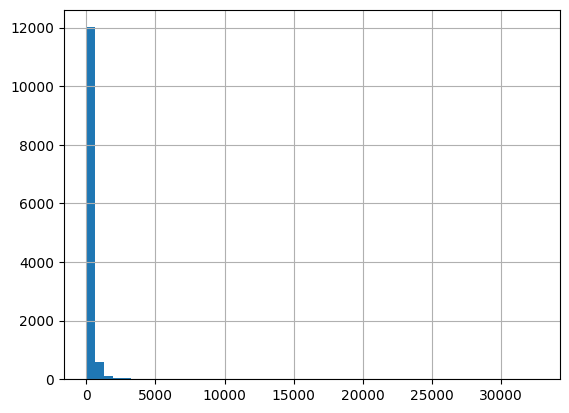

In [ ]:
df['clean_text_length'] = df['clean_text'].apply(lambda x: len(x))

print(f"Mean clean_text length: {df['clean_text_length'].mean()}")
print(f"Min clean_text length: {df['clean_text_length'].min()}")
print(f"Max clean_text length: {df['clean_text_length'].max()}")

df['clean_text_length'].hist(bins=50)

In [ ]:
char_counts = Counter(all_text)
print("Character frequency analysis:")
for char, count in char_counts.most_common(10):
    print(f"'{char}': {count}")

Character frequency analysis:
' ': 725050
'e': 382003
't': 310696
'a': 264288
'o': 258925
'i': 258036
'n': 235832
's': 226824
'r': 195650
'h': 142141


In [ ]:
num_words = len(all_words)
avg_word_length = sum(len(all_words) for all_words in all_words) / num_words
print(f"\nОбщее количество слов: {num_words}")
print(f"Средняя длина слова: {avg_word_length:.2f}")


Общее количество слов: 730860
Средняя длина слова: 4.84


In [ ]:
word_counts = Counter(clean_words)

print("Most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Most common words:
like: 2589
market: 2404
value: 2113
company: 2113
stock: 1915
think: 1755
-: 1631
good: 1539
companies: 1494
growth: 1476


In [ ]:
bigrams = list(ngrams(clean_words, 2))

bigram_counts = Counter(bigrams)

print("Most common bigrams:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")

Most common bigrams:
('value', 'investing'): 298
('long', 'term'): 263
('cash', 'flow'): 251
('free', 'cash'): 165
('market', 'cap'): 160
('stock', 'market'): 142
('share', 'price'): 140
('stock', 'price'): 136
('s&p', '500'): 134
('10', 'years'): 107


In [ ]:
trigrams = list(ngrams(clean_words, 3))

trigram_counts = Counter(trigrams)

print("Most common trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count}")

Most common trigrams:
('free', 'cash', 'flow'): 109
('*i', 'bot,', 'action'): 27
('bot,', 'action', 'performed'): 27
('action', 'performed', 'automatically.'): 27
('performed', 'automatically.', '[contact'): 27
('automatically.', '[contact', 'moderators'): 27
('[contact', 'moderators', 'subreddit](/message/compose/?to=/r/valueinvesting)'): 27
('moderators', 'subreddit](/message/compose/?to=/r/valueinvesting)', 'questions'): 27
('subreddit](/message/compose/?to=/r/valueinvesting)', 'questions', 'concerns.*'): 27
('|', '|', '|'): 22


In [ ]:
sentences = sent_tokenize(all_text, language='english')
num_sentences = len(sentences)
avg_sentence_length = num_words / num_sentences
print(f"\nTotal number of sentences: {num_sentences}")
print(f"Average sentence length (words): {avg_sentence_length:.2f}")


Total number of sentences: 42946
Average sentence length (words): 17.02


In [ ]:
nlp = spacy.load("en_core_web_sm")

pos_counts = Counter()
for doc in nlp.pipe(df['clean_text'].tolist()):
    pos_counts.update([token.pos_ for token in doc])

print("\nРаспределение частей речи:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")


Распределение частей речи:
INTJ: 1681
PRON: 27546
PUNCT: 99248
VERB: 80504
NOUN: 171628
ADJ: 56329
PROPN: 27708
ADV: 24518
SYM: 6204
NUM: 17851
X: 3673
DET: 5868
CCONJ: 2589
SCONJ: 4341
AUX: 10187
PART: 5732
ADP: 8066


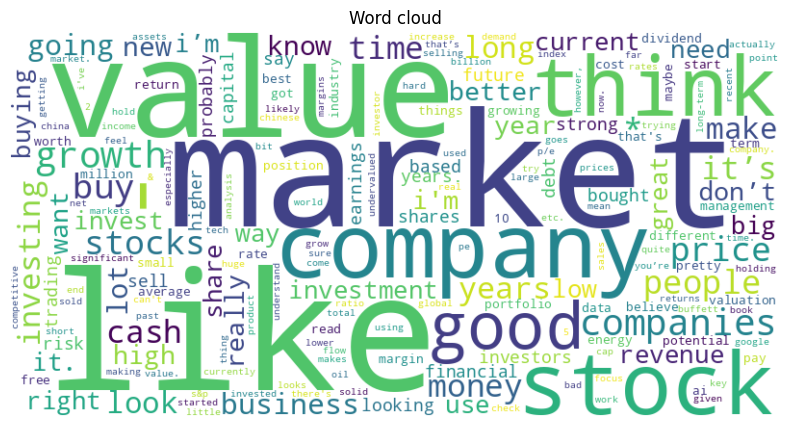

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud")
plt.show()

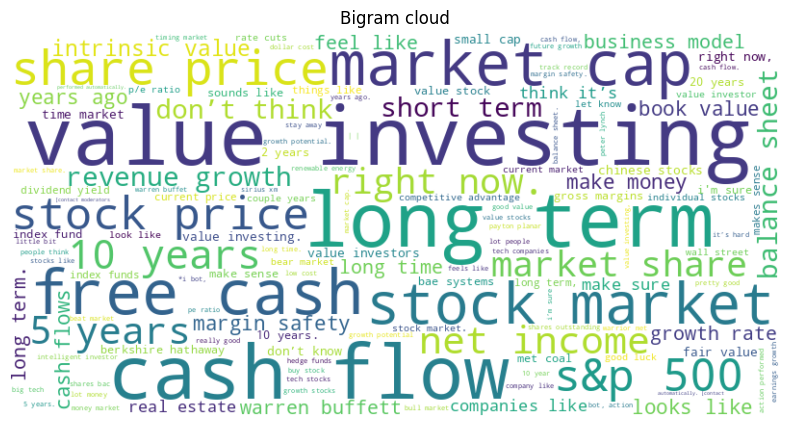

In [ ]:
bigram_dict = {" ".join(bigram): count for bigram, count in bigram_counts.items()}

bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Bigram cloud")
plt.show()

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.head()

,00,000,000000000001,000095017024104183,000095017024105263,000095017024108005,000095017024108228,000095017024109158,000095017024110123,000095017024111799,...,zytronic,zzdzcm,çecek,écarterez,établissements,était,ìf,ønsker,δinvested,δnopat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mean_tfidf_scores = tfidf_df.mean()
threshold = 0.01

high_frequency_terms = mean_tfidf_scores[mean_tfidf_scores >= threshold].index.tolist()
low_frequency_terms = mean_tfidf_scores[mean_tfidf_scores < threshold].index.tolist()

print("High-frequency terms based on TF-IDF:")
print(high_frequency_terms)

High-frequency terms based on TF-IDF:
['buy', 'companies', 'company', 'good', 'growth', 'investing', 'like', 'market', 'money', 'price', 'stock', 'stocks', 'think', 'time', 'value', 'years']


# t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=69, perplexity=5, n_iter=1000)

tsne_results = tsne.fit_transform(tfidf_df)

tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

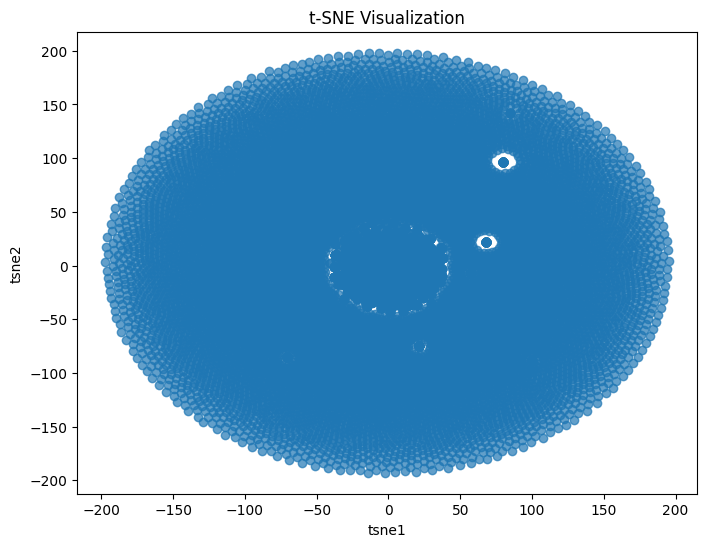

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.show()

## Reduce dimensionality using PCA, then use t-SNE

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

tsne = TSNE(n_components=2, perplexity=5, random_state=69, n_iter=1000)
tsne_results = tsne.fit_transform(reduced_data)
tsne_df_reduced = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

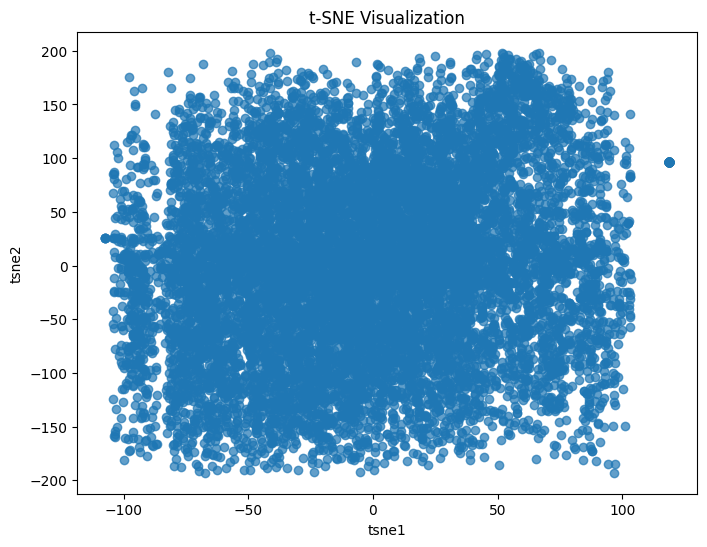

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df_reduced['tsne1'], tsne_df['tsne2'], alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.show()

# Doc2Vec embeddings

In [ ]:
!pip install gensim

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
tagged_data = [TaggedDocument(words=text.split(), tags=[doc_id]) for text, doc_id in zip(df['processed_text'], df['id'])]

In [ ]:
model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=40)

model.build_vocab(tagged_data)

model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [32]:
df.head()

,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id,clean_text,processed_text,doc_embedding
0,1gc59dz,Killam Apartment REIT (KMP-UN.TO) residential ...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:28:56,2024-10-26 01:00:01,"Hey all, \n\nHoping someone may have some insi...",2,1.0,submission,None,"hey all, hoping insight residential reit trade...",hey all hope insight residenti reit trade book...,"[-0.39821246, 0.28828236, -0.30557725, 0.16871..."
1,ltreavu,None,None,valueinvesting,2024-10-25 22:41:00,2024-10-26 01:00:01,REITs often trade below book value during peri...,1,NaN,comment,1gc59dz,reits trade book value periods high rates - un...,reit trade book valu period high rate unusu al...,"[-1.3911474, 0.8896715, -0.8849295, -0.0202289..."
2,1gc4xe1,Methode Electronics (MEI) - Great Long Term Va...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:13:44,2024-10-26 01:00:01,Hi guys - so I figured I'd post another intere...,1,2.0,submission,None,hi guys - i figured i'd post interesting i thi...,hi guy i figur i post interest i think sell wa...,"[-0.6564689, 0.34024408, 0.7947549, 0.88863134..."
3,ltr96s4,None,None,valueinvesting,2024-10-25 22:10:06,2024-10-26 01:00:01,This is a 2x if you look past the noise here. ...,2,NaN,comment,1gc4xe1,this 2x look past noise here. methode mistakes...,thi look past nois here method mistak market p...,"[-0.23063433, 0.062946476, 0.66006553, -0.8562..."
4,ltrgv9n,None,None,valueinvesting,2024-10-25 22:56:39,2024-10-26 01:00:01,This is a solid deep value play. The 0.42 P/B ...,1,NaN,comment,1gc4xe1,this solid deep value play. the 0.42 p/b ratio...,thi solid deep valu play the p b ratio jump im...,"[-0.20352504, 0.13888557, -0.92231023, -0.3897..."


In [35]:
df['doc_embedding'] = df['id'].map(lambda x: model.dv[str(x)])
df[['processed_text', 'doc_embedding']].head()

,processed_text,doc_embedding
0,hey all hope insight residenti reit trade book...,"[-0.39821246, 0.28828236, -0.30557725, 0.16871..."
1,reit trade book valu period high rate unusu al...,"[-1.3911474, 0.8896715, -0.8849295, -0.0202289..."
2,hi guy i figur i post interest i think sell wa...,"[-0.6564689, 0.34024408, 0.7947549, 0.88863134..."
3,thi look past nois here method mistak market p...,"[-0.23063433, 0.062946476, 0.66006553, -0.8562..."
4,thi solid deep valu play the p b ratio jump im...,"[-0.20352504, 0.13888557, -0.92231023, -0.3897..."
